In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

df = pd.read_csv('admissiondata.csv')
df['STATUS'] = pd.factorize(df.status)[0]


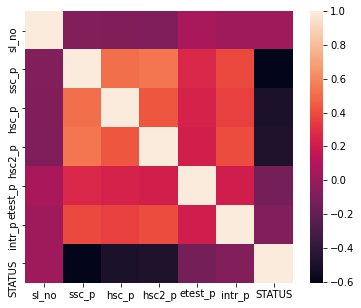

In [2]:
plt.figure(figsize=(6,5))
sb.heatmap(df.corr())
plt.show()

In [3]:
X = df[['ssc_p', 'hsc_p', 'hsc2_p', 'etest_p', 'intr_p']]
y = df['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

#from ipynb.fs.full.logReg import logisticReg

from logReg import logisticReg

def accuracy(y_true,y_pred):
  acc = np.sum(y_true == y_pred) / len(y_true)
  return acc

In [4]:
lr = logisticReg()

In [5]:
lr.fit(X_train, y_train)

In [6]:
predictions = lr.predict(X_test)

In [7]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : predictions})

In [8]:
df1

,Actual,Predicted
200,0,0
212,0,0
138,0,0
176,0,0
15,0,0
...,...,...
68,1,0
5,1,0
136,1,1
56,0,0


In [9]:
print("Accuracy of the predicted values: ", accuracy(y_test,predictions))

Accuracy of the predicted values:  0.8


Text(0.5, 33.0, 'Predicted Values')

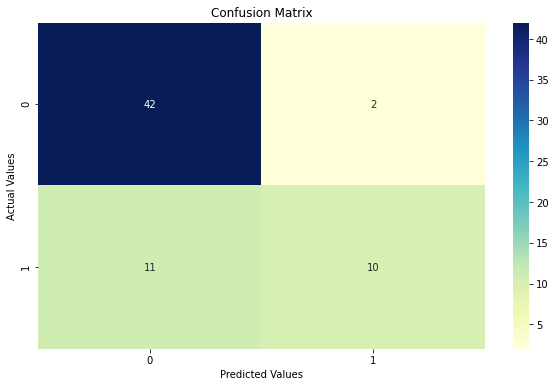

In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,6))
plt.title("Confusion Matrix")
sb.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")